# Analisis Data Pemain FIFA 19

### Disusun oleh: DEPI ANDY VIANTORO

Project ini bertujuan untuk menganalisis data nilai pemain pada FIFA 19 tahun 2019.
Berdasarkan data yang ada, masalah yang dapat dianalisis sebagai berikut:
             
        (1) Hal-hal yang mempengaruhi nilai pemain pada FIFA 19?
        
        (2) Model yang terbentuk terkait nilai pemain pada FIFA 19?
        
        (3) Berapa banyak cluster yang sesuai untuk pengelompokan data nilai pemain pada FIFA 19?

Sumber: File FIFA 19 complete player dataset di <a href="http://kaggle.com">Kaggle.com</a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
data = pd.read_csv("https://dts-bucket-fgs.s3.amazonaws.com/data.csv")
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
# checking if the data contains any NULL value
data.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [4]:
# checking data keseluruhan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

### 1. Scatter Plot untuk masing-masing features pada FIFA 19

In [4]:
# filling the missing value for the continous variables for proper data visualization

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)

In [5]:
data.fillna(0, inplace = True)

- Berikut hal-hal yang mempengaruhi nilai pemain pada FIFA 19, yaitu:

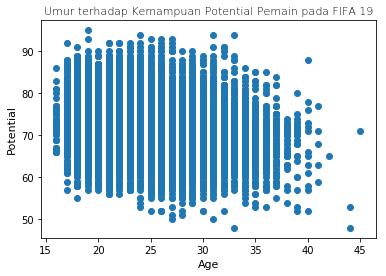

In [41]:
#Scatter plot umur terhadap nilai potensial (skill) pemain pada FIFA 19
#tampilkan dalam plot

import matplotlib.pyplot as plt
plt.scatter(data['Age'], data['Potential'])
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Potential', fontsize = 11)
plt.title('Umur terhadap Kemampuan Potential Pemain pada FIFA 19', fontweight= 11, fontsize= 11)
plt.show()

Umur pemain akan mempengaruhi kemampuan potensial pemain dalam bermain.

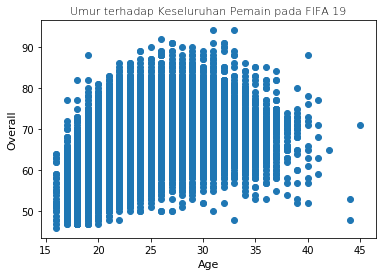

In [43]:
#Scatter plot umur terhadap nilai keseluruhan pemain pada FIFA 19
#tampilkan dalam plot

import matplotlib.pyplot as plt
plt.scatter(data['Age'], data['Overall'])
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Overall', fontsize = 11)
plt.title('Umur terhadap Keseluruhan Pemain pada FIFA 19', fontweight= 11, fontsize= 11)
plt.show()

Umur pemain akan mempengaruhi kemampuan keseluruhan pemain dalam bermain.

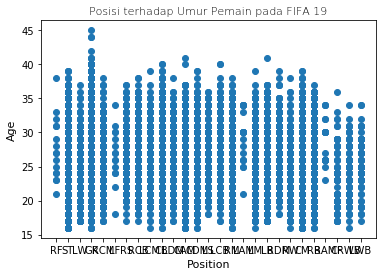

In [59]:
#Scatter plot posisi terhadap umur pemain pada FIFA 19
#tampilkan dalam plot

import matplotlib.pyplot as plt
plt.scatter(data['Position'], data['Age'])
plt.xlabel('Position', fontsize = 11)
plt.ylabel('Age', fontsize = 11)
plt.title('Posisi terhadap Umur Pemain pada FIFA 19', fontweight= 11, fontsize= 11)
plt.show()

Sebaran posisi pemain pada umur pemain dalam FIFA 19.

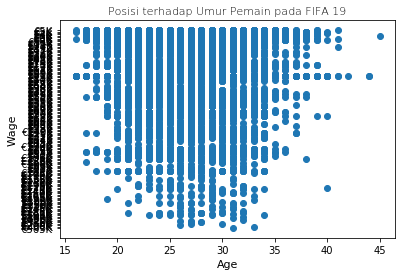

In [61]:
#Scatter plot umur terhadap gaji pemain pada FIFA 19
#tampilkan dalam plot

import matplotlib.pyplot as plt
plt.scatter(data['Age'], data['Wage'])
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Wage', fontsize = 11)
plt.title('Umur terhadap Gaji Pemain pada FIFA 19', fontweight= 11, fontsize= 11)
plt.show()

Umur pemain dan gaji yang diterima dalam bermain dalam FIFA 19.

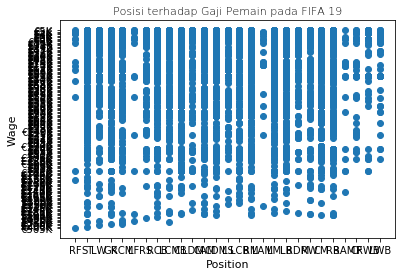

In [63]:
#Scatter plot posisi terhadap umur pemain pada FIFA 19
#tampilkan dalam plot

import matplotlib.pyplot as plt
plt.scatter(data['Position'], data['Wage'])
plt.xlabel('Position', fontsize = 11)
plt.ylabel('Wage', fontsize = 11)
plt.title('Posisi terhadap Gaji Pemain pada FIFA 19', fontweight= 11, fontsize= 11)
plt.show()

Posisi pemain dan gaji yang diterima dalam bermain dalam FIFA 19.

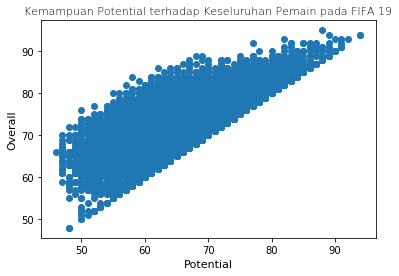

In [44]:
#Scatter plot nilai potensial (skill) terhadap nilai keseluruhan (overall) pemain pada FIFA 19
#tampilkan dalam plot

plt.scatter(data['Overall'], data['Potential'])
plt.xlabel('Potential', fontsize = 11)
plt.ylabel('Overall', fontsize = 11)
plt.title('Kemampuan Potential terhadap Keseluruhan Pemain pada FIFA 19', fontweight= 11, fontsize= 11)
plt.show()

Kemampuan potensial yang dimiliki oleh pemain sejalan dengan kemampuan keseluruhan yang dimiliki.

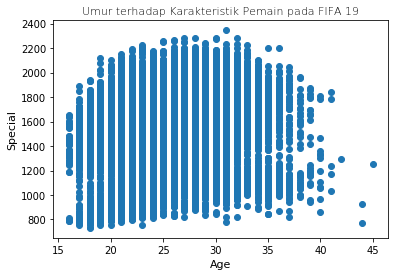

In [45]:
#Scatter plot umur terhadap special pemain pada FIFA 19
#tampilkan dalam plot

import matplotlib.pyplot as plt
plt.scatter(data['Age'], data['Special'])
plt.xlabel('Age', fontsize = 11)
plt.ylabel('Special', fontsize = 11)
plt.title('Umur terhadap Karakteristik Pemain pada FIFA 19', fontweight= 11, fontsize= 11)
plt.show()

Umur pemain dengan karakteristik pemain dalam FIFA 19 akan terlihat sebaran yang ada.

Untuk Scatter plot feature lainnya akan dibuat untuk ruang lingkup yang lebih rinci. Sebagai contoh nilai keseluruhan yang terdapat dalam data FIFA 19 akan dicari nilai keseluruhan terhadap nomor jearsey pemain untuk posisi Striker (ST).

In [46]:
data.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [47]:
santrafor = data[data.Position == "ST"]

<function matplotlib.pyplot.show(*args, **kw)>

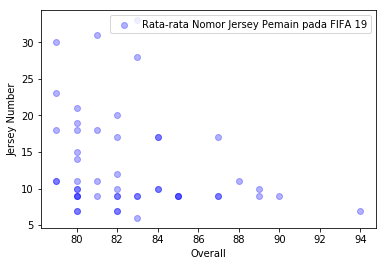

In [49]:
plt.scatter(santrafor.Overall.head(50),santrafor["Jersey Number"].head(50),color="blue",alpha=.3,label="Rata-rata Nomor Jersey Pemain pada FIFA 19")
plt.legend()
plt.xlabel("Overall")
plt.ylabel("Jersey Number")
plt.show

Nomor Jearsey yang biasanya dipakai untuk posisi striker (ST).

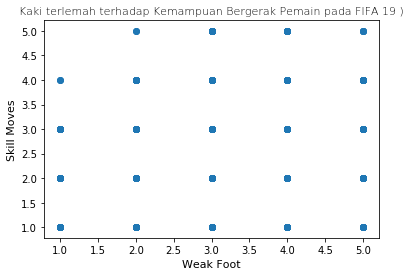

In [50]:
#Scatter plot nilai kaki lemah terhadap nilai potensial (skill) pemain pada FIFA 19
#tampilkan dalam plot

import matplotlib.pyplot as plt
plt.scatter(data['Weak Foot'], data['Skill Moves'])
plt.xlabel('Weak Foot', fontsize = 11)
plt.ylabel('Skill Moves', fontsize = 11)
plt.title('Kaki terlemah terhadap Kemampuan Bergerak Pemain pada FIFA 19 )', fontweight= 11, fontsize= 11)
plt.show()

Suatu pemain dalam bermain akan dipengaruhi oleh kelemahan kaki pemain tersebut, yang mengakibatkan kemampuan bergerak pemain tersebut.

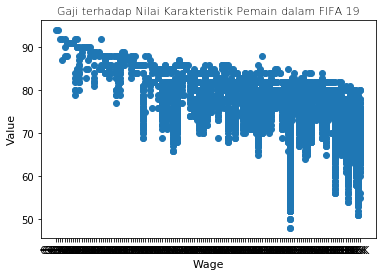

In [64]:
#Scatter plot gaji terhadap nilai pemain pada FIFA 19
#tampilkan dalam plot

import matplotlib.pyplot as plt
plt.scatter(data['Wage'], data['Value'])
plt.xlabel('Wage', fontsize = 11)
plt.ylabel('Value', fontsize = 11)
plt.title('Gaji terhadap Nilai Karakteristik Pemain dalam FIFA 19', fontweight= 11, fontsize= 11)
plt.show()

Faktor lain,karakteristik seorang pemain diketahui dari nilai pemain tersebut yang dipengaruhi oleh Nilai dan Gaji Pemain.

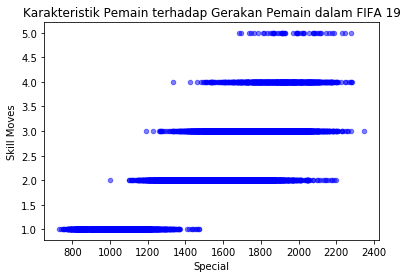

In [65]:
data.plot(kind= 'scatter', x='Special', y='Skill Moves', alpha = 0.5, color='blue')
plt.xlabel('Special')
plt.ylabel('Skill Moves')
plt.title('Karakteristik Pemain terhadap Gerakan Pemain dalam FIFA 19')
plt.show()

Karakteristik seorang pemain memiliki kemampuan bergerak (skill moves) yang berbeda dalam FIFA 19.

### 2. Berdasarkan Plot Data dari beberapa Scatter No. 1 ditemukan yang memiliki korelasi features pada FIFA 19

Dari sejumlah data yang diolah dengan berbagai variasi bentuk scatter plot data FIFA 19 terkait faktor nilai pemain, memiliki korelasi kuat antara nilai Potensial(potential) dan nilai keseluruhan (overall). Hubungan potensial dan overall menjadi plot yang terbaik, karena plot tersebut membentuk garis linear dan saling rapat terhadap garis linear serta tidak terdapat pencilan (outlier) yang terlalu jauh dari grafik.

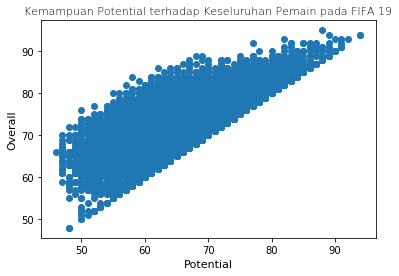

In [67]:
#Scatter plot (1) nilai potensial terhadap nilai keseluruhan (overall) pemain pada FIFA 19

plt.scatter(data['Overall'], data['Potential'])
plt.xlabel('Potential', fontsize = 11)
plt.ylabel('Overall', fontsize = 11)
plt.title('Kemampuan Potential terhadap Keseluruhan Pemain pada FIFA 19', fontweight= 11, fontsize= 11)
plt.show()

Berdasarkan scatter plot di atas, hubungan potensial pemain memiliki korelasi linier dengan overall sehingga menunjukkan nilai pemain pada FIFA 19.

### 3. Statistik Deskripsi dari 2 features yang memiliki korelasi pada FIFA 19

In [22]:
# Deskripsi Data Pemain pada FIFA 19
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Klausal
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.112924,2.947438,2.360356,19.508046,...,58.493656,47.156973,47.572088,45.541056,16.572417,16.348382,16.189268,16.345691,16.666831,68.773219
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.393554,0.659591,0.755394,15.935210,...,11.810375,20.025458,21.773243,21.389596,17.692536,16.905507,16.502101,17.032944,17.951898,5.951240
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,51.000000,30.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,65.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,72.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,94.000000


Berdasarkan analisis yang diperoleh untuk nilai potensial dan nilai keseluruhan pemain pada FIFA 19, menunjukan hasil statistik sebagai berikut:

In [66]:
df = data[['Potential','Overall']]
df.describe()

,Potential,Overall
count,18207.000000,18207.000000
mean,71.307299,66.238699
std,6.136496,6.908930
min,48.000000,46.000000
25%,67.000000,62.000000
50%,71.000000,66.000000
75%,75.000000,71.000000
max,95.000000,94.000000


Begitu juga, pengerjaan dengan menggunakan cara yang lain akan menunjukkan hasil yang sama.

In [30]:
# Statistika Deskriptif untuk features Nilai Potensial (Potential) pada Pemain FIFA 19
import pandas as pd
import numpy as np
# menentukan dataframe dari Nilai Potensial
Pot = data['Potential']

# mencari mean, median, modus, maksimal, minimal, jarak, variasi, simpangan baku dan koefisien variasi
meanPot = Pot.mean()
medianPot = Pot.median()
modusPot = Pot.mode()
maksPot = Pot.max()
minPot = Pot.min()
jarakPot = maksPot - minPot
variansPot = Pot.var()
simp_bakuPot = Pot.std()
koef_varPot = simp_bakuPot / meanPot

# menampilkan ukuran nilai Potensial
print('Mean Nilai Potensial : ',meanPot)
print('Median Nilai Potensial : ',medianPot)
print('Modus Nilai Potensial : ',modusPot[0])
print('Maksimum Nilai Potensial : ',maksPot)
print('Minimum Nilai Potensial : ',minPot)
print('Jarak Nilai Potensial : ',jarakPot)
print('Varian Nilai Potensial : ',variansPot)
print('Simpangan Baku Nilai Potensial : ',simp_bakuPot)
print('Koefisien Variasi Nilai Potensial : ', koef_varPot)

Mean Nilai Potensial :  71.30729939034437
Median Nilai Potensial :  71.0
Modus Nilai Potensial :  70
Maksimum Nilai Potensial :  95
Minimum Nilai Potensial :  48
Jarak Nilai Potensial :  47
Varian Nilai Potensial :  37.65657804630208
Simpangan Baku Nilai Potensial :  6.136495583498947
Koefisien Variasi Nilai Potensial :  0.08605704655714226


In [33]:
# Statistika Deskriptif untuk features Nilai Keseluruhan (Overall)
import pandas as pd
import numpy as np
# menentukan dataframe dari Nilai Keseluruhan
Ove = data['Overall']

# mencari mean, median, modus, maksimal, minimal, jarak, variasi, simpangan baku dan koefisien variasi
meanOve = Ove.mean()
medianOve = Ove.median()
modusOve = Ove.mode()
maksOve = Ove.max()
minOve = Ove.min()
jarakOve = maksOve - minOve
variansOve = Ove.var()
simp_bakuOve = Ove.std()
koef_varOve = simp_bakuOve / meanOve

# menampilkan ukuran nilai Keseluruhan
print('Mean Nilai Keseluruhan : ',meanOve)
print('Median Nilai Keseluruhan : ',medianOve)
print('Modus Nilai Keseluruhan : ',modusOve[0])
print('Maksimum Nilai Keseluruhan : ',maksPot)
print('Minimum Nilai Keseluruhan : ',minOve)
print('Jarak Nilai Keseluruhan : ',jarakOve)
print('Varian Nilai Keseluruhan : ',variansOve)
print('Simpangan Baku Nilai Keseluruhan : ',simp_bakuOve)
print('Koefisien Variasi Nilai Keseluruhan : ', koef_varOve)

Mean Nilai Keseluruhan :  66.23869940132916
Median Nilai Keseluruhan :  66.0
Modus Nilai Keseluruhan :  66
Maksimum Nilai Keseluruhan :  95
Minimum Nilai Keseluruhan :  46
Jarak Nilai Keseluruhan :  48
Varian Nilai Keseluruhan :  47.73330838195221
Simpangan Baku Nilai Keseluruhan :  6.908929611882886
Koefisien Variasi Nilai Keseluruhan :  0.1043035215716245


### 4. Analisis Model Regresi dan Keakuratannya pada FIFA 19

In [4]:
import numpy as np
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

Memilih 0.8 bagian data secara random dari keseluruhan data FIFA 19 yang digunakan untuk menghitung model dan sisanya untuk menguji model tersebut.

Langsung masuk dalam analisis:

In [5]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Potential']])
train_y = np.asanyarray(train[['Overall']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.74481383]]
Intercept:  [13.14569514]


Text(0, 0.5, 'Overall')

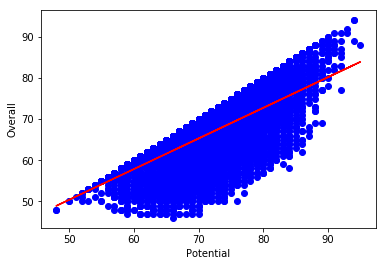

In [6]:
plt.scatter(train.Potential, train.Overall,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Potential")
plt.ylabel("Overall")

In [7]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Potential']])
test_y = np.asanyarray(test[['Overall']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 4.28
Residual sum of squares (MSE): 26.93
R2-score: -0.27


Berdasarkan hasil perhitungan model regresi linear dengan variabel independen(x) adalah potensial dan variabel dependen(y) adalah overall, diperoleh model regresinya adalah y = 0.74481383 + 13.14569514x, karena nilai MSE (26.93) yang besar dan nilai R2-score (-0.27) yang negatif, sehingga dapat disimpulkan model tidak baik untuk digunakan dan alangkah baiknya untuk dianalisis dengan menggunakan model yang lain. Dengan hal ini, potential tidak berpengaruh terhadap overall.

Tiap kenaikan 1 satuan x (potential) akan menaikkan y (overall)sebesar 0.74481383.

### 5. Analisis Menggunakan Analisis Association/Clustering/Classification

In [25]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Dalam analisis ini, menggunakan Model Clustering dalam pengerjaannya.

In [23]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [24]:
data1 = data[['Stamina','Balance','Acceleration','Agility','Overall']]

Posisi Stamina, Balance, Acceleration, Agility sebagai variabel independe (x) dan Overall sebagai dependen (y) dari beberapa feature yang ada pada data FIFA 19.

In [25]:
from sklearn.preprocessing import StandardScaler
X = data1.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 2.15287972,  1.73895109,  1.83186767,  4.01828714],
       [ 0.42793002,  1.60798758,  1.56699198,  4.01828714],
       [ 1.39390185,  1.93539634,  2.16296227,  3.72879875],
       ...,
       [-0.40004584,  0.36383427, -0.88310806, -2.78469008],
       [ 0.49692801, -0.22550151, -0.75067022, -2.78469008],
       [-0.0550559 , -0.48742852, -0.55201346, -2.92943428]])

Dalam clustering, kita menganalisis dari performance pemain, terkait: Stamina, Balance, Acceleration & Agility terhadap Overall dari data FIFA 19.

In [26]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 ... 0 0 1]


Menampilkan cluster data dari data FIFA 19.

In [27]:
data1["Clus_km"] = labels
data1.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Stamina,Balance,Acceleration,Agility,Overall,Clus_km
0,72.0,95.0,91.0,91.0,94,0
1,88.0,70.0,89.0,87.0,94,0
2,81.0,84.0,94.0,96.0,92,0
3,43.0,43.0,57.0,60.0,91,1
4,90.0,77.0,78.0,79.0,91,0


In [28]:
KMeansClusterCenter = data1.groupby("Clus_km").mean()

Beberapa pengujian untuk cluster yang terbaik dalam data FIFA 19:

#### Pengujian Stamina terhadap Overall dalam data FIFA 19

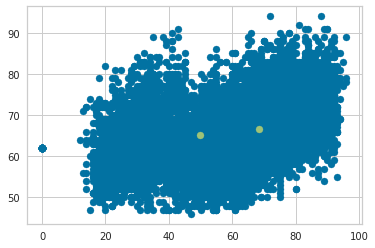

In [29]:
#Pengujian Stamina terhadap Overall dalam data FIFA 19

plt.scatter(data1['Stamina'], data1['Overall'])
plt.scatter(KMeansClusterCenter['Stamina'], KMeansClusterCenter['Overall'])
plt.show()

Kondisi yang ditampilkan oleh stamina dan overall dalam data FIFA 19.

#### Pengujian Balance terhadap Overall dalam data FIFA 19

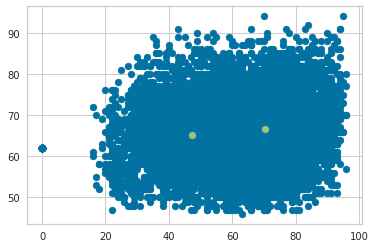

In [36]:
#Pengujian Balance terhadap Overall dalam data FIFA 19

plt.scatter(data1['Balance'], data1['Overall'])
plt.scatter(KMeansClusterCenter['Balance'], KMeansClusterCenter['Overall'])
plt.show()

Kondisi yang ditampilkan oleh balance dan overall dalam data FIFA 19.

#### Pengujian Acceleration terhadap Overall dalam data FIFA 19

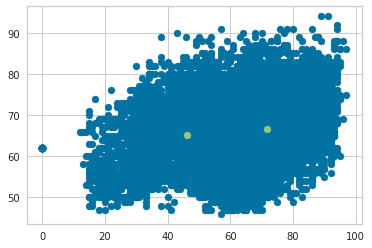

In [39]:
#Pengujian Acceleration terhadap Overall dalam data FIFA 19

plt.scatter(data1['Acceleration'], data1['Overall'])
plt.scatter(KMeansClusterCenter['Acceleration'], KMeansClusterCenter['Overall'])
plt.show()

Kondisi yang ditampilkan oleh acceleration dan overall dalam data FIFA 19.

#### Pengujian Agility terhadap Overall dalam data FIFA 19

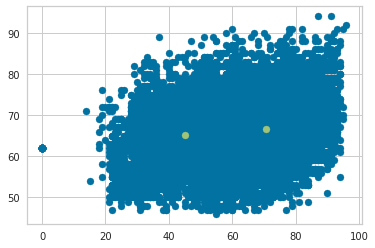

In [38]:
#Pengujian Agility terhadap Overall dalam data FIFA 19

plt.scatter(data1['Agility'], data1['Overall'])
plt.scatter(KMeansClusterCenter['Agility'], KMeansClusterCenter['Overall'])
plt.show()

Kondisi yang ditampilkan oleh agility dan overall dalam data FIFA 19.

Begitu ditampilkan dalam pencairan Silhouette, sebagai berikut:

In [41]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, k_means.labels_))

0.46729451289680696


Hasil Silhouette skor menunjukkan jumlah cluster yang sesuai adalah 2 cluster dan nilai yang diperoleh 0.46729451289680696 (nilainya mendekati satu).

Begitu sebaliknya apabila pengerjaan dengan menggunakan Yellowbrick.

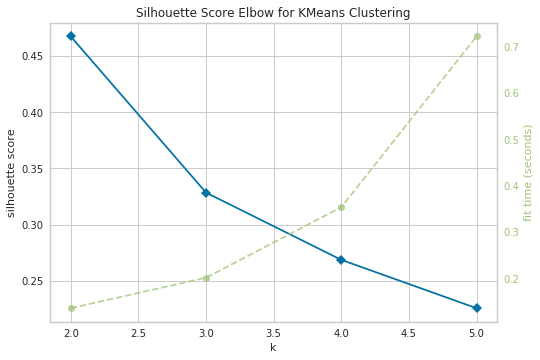

In [22]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,6),metric = 'silhouette', timing=False)
visualizer.fit(X)
visualizer.poof()

Hasil menunjukkan bahwa cluster yang sesuai untuk pengelompokan berdasarkan variabel independe (x) dan Overall sebagai dependen (y) yaitu 2 cluster.